In [34]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 5)

In [35]:
from IPython.display import Audio
Audio('nightingale.wav')

In [36]:
from scipy.io import wavfile

# Read audio file released under CC BY 4.0 at
# http://www.orangefreesounds.com/nightingale-sound/

# Get sampling rate (number of measurements per second)
# as well as audio data as an (N, 2) array -- two columns
# because this is a stereo recording.

rate, audio = wavfile.read('nightingale.wav')
print(rate, audio.shape)

44100 (338081, 2)


/home/stefan/src/scipy/scipy/io/wavfile.py:179: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


Audio length: 7.67 seconds


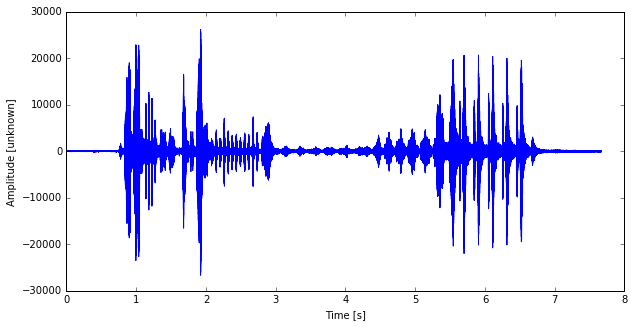

In [43]:
# Average left and right audio channels
mono = np.mean(audio, axis=1)

# How long is the audio snippet?

N = mono.shape[0]
L = N / rate

print('Audio length: {:.2f} seconds'.format(L))

f, ax = plt.subplots()
ax.plot(np.arange(N) / rate, mono)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude [unknown]')
plt.show()

<img src="sliding_win.png" width="60%" style="float: left;"/>

In [44]:
from skimage import util

M = 1024

# Chop up the signal into slices of 1024 samples, each slice
# overlapping the previous by 100 samples
slices = util.view_as_windows(mono, window_shape=M, step=100)
print('Audio shape: {}, Sliced audio shape: {}'.format(mono.shape, slices.shape))

print(slices.shape)

Audio shape: (338081,), Sliced audio shape: (3371, 1024)
(3371, 1024)


Calculate the Fourier transform for each slice.

In [50]:
win = np.hanning(M + 1)[:-1]
slices = slices * win

spectrum = np.fft.fft(slices, axis=1).T
spectrum = np.abs(spectrum)

Do a log plot of the ratio of the signal / the maximum signal
The unit for such a ratio is the decibel.

Another reason to take logs is because the spectrum can contain both
very large and very small values.  Taking the log compresses the
range significantly.

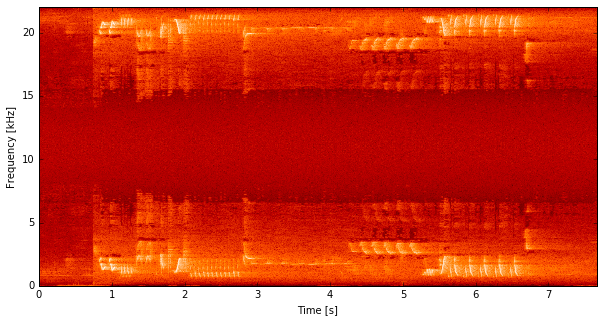

In [54]:
f, ax = plt.subplots()

S = np.abs(spectrum)
S = 20 * np.log10(S / S.max())

ax.imshow(S, cmap='gist_heat', origin='lower',
          extent=(0, L, 0, rate / 2 / 1000))
ax.axis('tight')
ax.set_ylabel('Frequency [kHz]')
ax.set_xlabel('Time [s]')
plt.show()

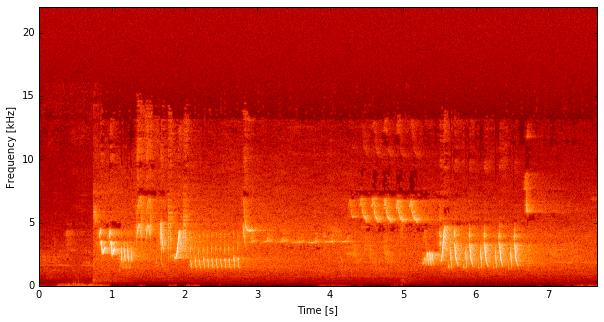

In [55]:
f, ax = plt.subplots()

ax.imshow(S[:M // 2, :], cmap='gist_heat', origin='lower',
          extent=(0, L, 0, rate / 2 / 1000))
ax.axis('tight')
ax.set_ylabel('Frequency [kHz]')
ax.set_xlabel('Time [s]')
plt.show()

Audio('nightingale.wav')

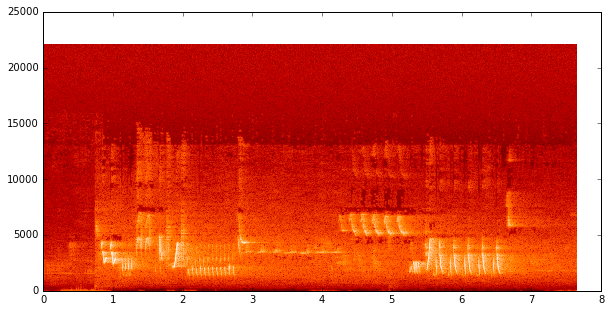

In [56]:
from scipy import signal

freqs, times, Sx = signal.spectrogram(mono, fs=rate, window='hanning',
                                      nperseg=1024, noverlap=M - 100,
                                      detrend=False, scaling='spectrum')

plt.pcolormesh(times, freqs, 10 * np.log10(Sx), cmap='gist_heat');